In [1]:
import pandas as pd
import numpy as np
import re
import datetime
import time
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
%matplotlib inline



# 1 - Скачать Access Log сервера NASA за июль 1995 года
# 2 - Распарсить файл в Pandas DataFrame
# 3 - Посчитать кол-во обращений к каждому урлу
# 4 - Найти топ-15 самый посещаемых урлов
# 5 - Посчитать число запросов в секунду
# 6 - Нарисовать график числа запросов в секунду
# 7 - построить гистограмму распределения размеров запросов

In [2]:
df = pd.read_csv('NASA_access_log_Jul95.txt',sep=' ',\
encoding='ISO-8859-1',header=None,\
error_bad_lines=False,engine='c',\
infer_datetime_format=True)

b'Skipping line 131906: expected 8 fields, saw 9\nSkipping line 132118: expected 8 fields, saw 9\nSkipping line 132154: expected 8 fields, saw 9\nSkipping line 132224: expected 8 fields, saw 9\n'
b'Skipping line 517923: expected 8 fields, saw 9\n'
b'Skipping line 840935: expected 8 fields, saw 9\n'
b'Skipping line 1008202: expected 8 fields, saw 9\n'
b'Skipping line 1051501: expected 8 fields, saw 9\nSkipping line 1105478: expected 8 fields, saw 9\n'
b'Skipping line 1295174: expected 8 fields, saw 9\n'
b'Skipping line 1356360: expected 8 fields, saw 9\n'
b'Skipping line 1511872: expected 8 fields, saw 9\nSkipping line 1511991: expected 8 fields, saw 9\nSkipping line 1545658: expected 8 fields, saw 11\n'


In [3]:
df.columns=['host','todel1','todel2','timestamp','timezone','requests','http_code','bitr']
df = df.drop(['todel1', 'todel2'],axis=1)

In [4]:
df = df[df['timestamp'].notnull()]

In [5]:
df['timestamp'] = df['timestamp'].replace('\[','',regex=True)
df['timezone'] = df['timezone'].replace('\]','',regex=True)

In [6]:
df.groupby(['host'])['requests'].count().sort_values(ascending=False).head(5)

host
piweba3y.prodigy.com    17571
piweba4y.prodigy.com    11591
piweba1y.prodigy.com     9868
alyssa.prodigy.com       7852
siltb10.orl.mmc.com      7573
Name: requests, dtype: int64

In [7]:
df['time'] = pd.to_datetime(df['timestamp'], format='%d/%b/%Y:%H:%M:%S')


In [8]:
#дф с шагом 1 секунда
r1 = DataFrame(pd.date_range(start='1995-07-01 00:00:00', end='1995-07-28 13:32:25',freq='S'))
r1.columns=['date']

In [9]:
# #дф с кол-ом запросов в определенное время
r2 = DataFrame(df.groupby('time')['time'].count())
r2.index.name='date'
r2.columns=['quantity']
r2.reset_index(level=0, inplace=True)

In [10]:
r2

,date,quantity
0,1995-07-01 00:00:01,1
1,1995-07-01 00:00:06,1
2,1995-07-01 00:00:09,1
3,1995-07-01 00:00:11,2
4,1995-07-01 00:00:12,3
5,1995-07-01 00:00:13,2
6,1995-07-01 00:00:14,3
7,1995-07-01 00:00:15,3
8,1995-07-01 00:00:17,2
9,1995-07-01 00:00:18,1


In [10]:
# data = DataFrame(df['timestamp'])
# count = data.size
# ones = np.ones(count, dtype=int)
# data['Counts'] = ones
# grouped = df.groupby('Request_Time').count()

In [11]:
r3 = r1.merge(r2,how='outer')
r3 = r3.fillna(0)

In [12]:
df44 = r3.sort_values('date', ascending=True)


In [59]:
df44

,date,quantity,day
0,1995-07-01 00:00:00,0.0,1
1,1995-07-01 00:00:01,1.0,1
2,1995-07-01 00:00:02,0.0,1
3,1995-07-01 00:00:03,0.0,1
4,1995-07-01 00:00:04,0.0,1
5,1995-07-01 00:00:05,0.0,1
6,1995-07-01 00:00:06,1.0,1
7,1995-07-01 00:00:07,0.0,1
8,1995-07-01 00:00:08,0.0,1
9,1995-07-01 00:00:09,1.0,1


In [13]:
df44['day'] = pd.DatetimeIndex(df44['date']).day

In [14]:
arr = df44.groupby('day')['quantity'].sum().tolist()

In [15]:
sum = 0
for i in arr:
    print((i/86400))
    sum+=(i/86400)

0.7490046296296297
0.697511574074074
1.0368055555555555
0.8154166666666667
1.0946180555555556
1.1685185185185185
1.0096296296296297
0.44984953703703706
0.40824074074074074
0.843287037037037
0.9306365740740741
1.0710069444444446
1.553263888888889
0.9733912037037037
0.5269907407407407
0.5538657407407407
0.8678356481481482
0.7439930555555555
0.8418634259259259
0.7707523148148148
0.7479976851851852
0.4081712962962963
0.4536921296296296
0.7437384259259259
0.7256828703703704
0.6811226851851852
0.7138888888888889
0.313900462962963


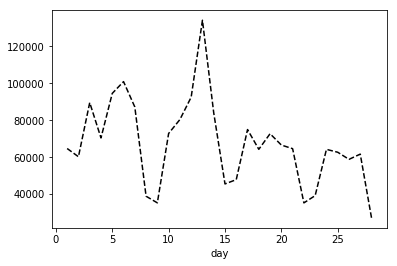

In [16]:
df44.groupby('day')['quantity'].sum().plot(style='k--');

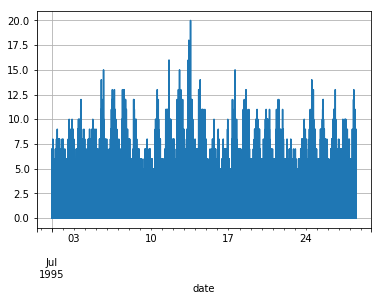

In [18]:
df44.plot(x='date',y='quantity',grid=True,legend=False,sharey=True,rot=0)

In [19]:
# plt.plot(df44['date'], df44['quantity'],'*')
# plt.xticks(rotation='vertical')

In [20]:
df44['day'] = pd.DatetimeIndex(df44['date']).day

In [38]:
df['day'] = pd.DatetimeIndex(df['time']).day


In [40]:
df[df['bitr'] == '-'] = 0
df['bitr'] = df['bitr'].astype(float)

In [61]:
plt.rcParams['figure.figsize'] = (10,6)

In [78]:
dfm = df[['day','bitr']]

In [ ]:
dfm.head()

In [99]:
dfm['bitr'].describe().astype(int)

count    1891700
mean       20455
std        76957
min            0
25%          786
50%         3635
75%        11853
max      6823936
Name: bitr, dtype: int64

In [22]:
# df[df['bitr'] == '-'] = 0
# df['bitr'] = df['bitr'].astype(float)

In [29]:
# df.groupby('day')['requests'].count()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11911a240>]],
      dtype=object)

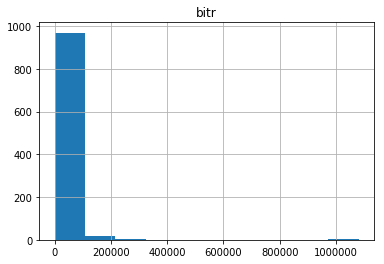

In [41]:
# dfm[:1000].hist()
# plt.rcParams['figure.figsize'] = (10,6)
# import matplotlib
# matplotlib.style.use('ggplot')